In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from scipy.optimize import curve_fit
import time
from math import *

In [21]:
def daction(x1,x,xm1,xp):
    dxn=xp-x
    sxn=xp+x
    sx1=x1+xm1
    
    delta_s=dxn*(sxn*(c1 + c2) -sx1*c1)
    
    return delta_s

def dactionp(raw_data,num_config,num_lat_points,c1p,c2p):
    
    data=raw_data
    niter=num_config
    points=num_lat_points
    ssps=[]
    
    for h in range(niter):
        
        sum1=0
        
        for j in range(points):

            if j == (h+1)*points - 1:
                xn=eval(data[h*points + j]) ####periodic boundary conditions
                xp1=eval(data[h*points])
                
            else:
                xn=eval(data[h*points + j])
                xp1=eval(data[h*points + j+1])
            
            sum1=sum1+ c1p*(xp1-xn)**2 + c2p*xn**2
            
        ssps=np.append(ssps, sum1)
            
            
    
    return ssps
    

def exp_fun(x, a, b, c):
    return  a*(np.exp(-b*x)) + c

def constant(x,c):
    return c

def excite(num_configurations,num_lat_points,raw_data,lattice_spacing,m,spring_constant):
    niter=num_configurations
    points=num_lat_points
    data=raw_data
    a=lattice_spacing
    mass=m
    mu=spring_constant
    
    num=[]
    dnm=[]
    for m in range(20):
    
        sum1=0
        sum2=0
        for n in range(niter):
            
            x0=eval(data[n*points])
            xnm1=eval(data[n*points + m])
            xn=eval(data[n*points + m+1])
            
            sum1=sum1+(x0*xn)
            sum2=sum2+(x0*xnm1)
        
        num=np.append(num, sum1/niter)
        dnm=np.append(dnm, sum2/niter)
    
    effe=-(1/a)*np.log(num/dnm)
    
    lat_time=np.arange(0,len(effe),1)
    
    plt.figure(3)
    plt.xlabel('Lattice time')
    plt.ylabel('Energy gap')
    plt.title('Determining plateau')
    plt.plot(lat_time, effe)
    ediff=(9*mu**2/(4*mass))**0.5 - (mu**2/(4*mass))**0.5
    plt.plot([0,max(lat_time)],[ediff,ediff])
    plt.show()

    return (lat_time, effe)

def metro(config,num_lat_points):
    
    state=config
    points=num_lat_points
     
    for n in range(points):

        x_t=(np.random.uniform((state[n]-step), (state[n]+step)))
        if n==0:
            delta=daction(state[n+1],state[n],state[points-1],x_t)

            if np.exp(-delta)> (np.random.uniform(0,1)):
                np.put(state,[n],[x_t])
            else:
                pass

        elif n==(points-1):
            delta=daction(state[0],state[n],state[n-1],x_t)

            if np.exp(-delta)> (np.random.uniform(0,1)):
                np.put(state,[n],[x_t])
            else:
                pass
        else:
            delta=daction(state[n+1],state[n],state[n-1],x_t)

            if  np.exp(-delta) > (np.random.uniform(0,1)):
                np.put(state,[n],[x_t])
            else:
                pass
    return(state)
    

def thermalization(num_iter,lat_points,mass):
    tniter=num_iter 
    num_accept=0
    points=lat_points
    state=0*np.random.random_sample((points,))
    avg_pos=0*np.random.random_sample((tniter+1,))
    avg_pos2=0*np.random.random_sample((tniter+1,))
    

    for h in state:
            avg_pos[0]=avg_pos[0]+h
            avg_pos2[0]=avg_pos2[0]+h**2

    for m in range(tniter):

        for n in range(points):

            x_t=(np.random.uniform((state[n]-step), (state[n]+step)))
            if n==0:
                delta=daction(state[n+1],state[n],state[points-1],x_t)

                if np.exp(-delta)> (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                    num_accept=num_accept+1
                else:
                    pass

            elif n==(points-1):
                delta=daction(state[0],state[n],state[n-1],x_t)

                if np.exp(-delta)> (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                    num_accept=num_accept+1
                else:
                    pass
            else:
                delta=daction(state[n+1],state[n],state[n-1],x_t)

                if  np.exp(-delta) > (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                    num_accept=num_accept+1
                else:
                    pass

        for h in state:
            avg_pos[m+1]=avg_pos[m+1]+h
            avg_pos2[m+1]=avg_pos2[m+1]+h**2

    avg_pos=avg_pos/points
    avg_pos2=avg_pos2/points
    print("Acceptance ratio :", num_accept/(tniter*points), "\n The acceptance ratio needs to be around 0.5. \n If it's too low try reducing 'step', and vv if it's too high. ")
    
    config=np.arange(tniter+1)
    
    m=mass

    plt.figure(1)
    plt.xlabel('Configuration')
    plt.ylabel('Average position')
    plt.title('Distance vs configuration number')
    plt.plot(config, avg_pos)
    plt.show()
    
    plt.figure(2)
    plt.xlabel('Configuration')
    plt.ylabel('Average distance squared')
    plt.title('Distance squared vs configuration number. Tuned axis')
    plt.plot(config, avg_pos2)
    #plt.axis([0,400,0,max(avg_pos2)]) ####May need to tune x-axis
    plt.show()
    
    plt.figure(3)
    plt.xlabel('Configuration')
    plt.ylabel('g/s energy')
    plt.title('g/s energy vs configuration number')
    plt.plot(config, (mu**2)*avg_pos2)
    print((mu**2/(4*m))**0.5)
    plt.plot([0,max(config)], [(mu**2/(4*m))**0.5,(mu**2/(4*m))**0.5])
    plt.show()
    
    
    
def data(spring_const,mass,lattice_spacing,num_config,num_lat_points):
    mu=spring_const
    m=mass
    a=lattice_spacing
    niter=num_config
    points=num_lat_points
    smu=mu,
    sm=m,
    sma=a,
    sniter=niter,
    spoints=points,
    smu=str(smu)
    sm=str(sm)
    sma=str(sma)
    sniter=str(sniter)
    spoints=str(spoints)
    name=smu+sm+sma+sniter+spoints
    
    state=0*np.random.random_sample((points,)) #### Initial state
    f=open('data'+name+'.txt' , 'w')
    
    for m in range(ttime): #### thermalizaing state

        state=metro(state,points) #### config,num_lat_points    
    for h in state:
        f.write(str(h) + '\n')
    
    for m in range(niter):

        state=metro(state,points) #### config,num_lat_points
        
        for h in state:
            f.write(str(h) + '\n')
        
    f.close()
    print("Raw data gathered.")
    
def corr(spring_const,mass,lattice_spacing,num_config,num_lat_points):
    mu=spring_const
    m=mass
    a=lattice_spacing
    niter=num_config
    points=num_lat_points
    smu=mu,
    sm=m,
    sma=a,
    sniter=niter,
    spoints=points,
    smu=str(smu)
    sm=str(sm)
    sma=str(sma)
    sniter=str(sniter)
    spoints=str(spoints)
    name=smu+sm+sma+sniter+spoints
    
    f=open('data'+name+'.txt' , 'r')
    data=f.readlines()
    f.close()
    corr=[]
    for n in range(corrt):
        
        sum1=0
        sum2=0
        for m in range(points):
            sum1=sum1+(eval(data[m])*eval(data[m+((n+1)*points)]))
        corr=np.append(corr,sum1/points)
    
    corr_time=np.arange(corrt)
    corr=corr/(max(corr))
    
    popt, pcov = curve_fit(exp_fun, corr_time, corr)
    
    plt.figure(1)
    plt.xlabel('Correlation time')
    plt.ylabel('Correlation')
    plt.title('Correlation graph')
    plt.plot(corr_time, exp_fun(corr_time, *popt))
    plt.plot(corr_time, corr)
    plt.savefig('corr_t'+name+'.pdf')
    
    print("Correlation time determined.")
    
    return (popt, pcov, data)


def binning(spring_const,mass,lattice_spacing,num_config,num_lat_points,size_of_bin,raw_data):
    mu=spring_const
    m=mass
    a=lattice_spacing
    niter=num_config
    points=num_lat_points
    smu=mu,
    sm=m,
    sma=a,
    sniter=niter,
    spoints=points,
    smu=str(smu)
    sm=str(sm)
    sma=str(sma)
    sniter=str(sniter)
    spoints=str(spoints)
    name=smu+sm+sma+sniter+spoints
    
    data=raw_data
    
    bin_size=size_of_bin
    num_bins=int(niter/bin_size)
    
    delta=d_volume/2 #### 'infinitesimal' volume about a point
    ppdensity=[0]
    npdensity=[0]
        
    f=open('2binned_data'+name+'.txt' , 'w')
    g=open('data'+name+'.txt', 'r')
    
    for n in range(num_bins):
        
        sum1=0
        for m in range(bin_size):
            
            for l in range(points):
                num=eval(g.readline())
                sum1=sum1+num**2
            
        f.write(str(sum1/(points*bin_size)) + '\n')
    
    f.close()
    g.close()
    
    print("binned data produced")
    

def probd(spring_const,mass,lattice_spacing,num_config,num_lat_points,size_of_bin,d_volume,pdsets):
    mu=spring_const
    m=mass
    a=lattice_spacing
    niter=num_config
    points=num_lat_points
    smu=mu,
    sm=m,
    sma=a,
    sniter=niter,
    spoints=points,
    smu=str(smu)
    sm=str(sm)
    sma=str(sma)
    sniter=str(sniter)
    spoints=str(spoints)
    name=smu+sm+sma+sniter+spoints
    
    sets=pdsets
    bin_size=size_of_bin
    num_bins=int(niter/bin_size)
    
    delta=d_volume/2 #### 'infinitesimal' volume about a point
    ppdensity=[0]
    npdensity=[0]

    g=open('data'+name+'.txt', 'r')
    data=g.readlines()
    
    
    for m in range(sets):
    
        for n in range(points): ############################## Poss change

            dp=eval(data[n + m*bin_size*points])
            ## Determining Probability density

            if dp >= 0:
                axis=int(dp/delta +1)
                while axis > len(ppdensity): ########
                    ppdensity=np.append(ppdensity,0)

                ppdensity[axis-1]=ppdensity[axis-1] +1

            else:
                mdp=abs(dp)
                axis=int(mdp/delta +1)
                while axis > len(npdensity): ##########
                    npdensity=np.append(npdensity,0)

                npdensity[axis-1]=npdensity[axis-1]+1
                
    g.close()
    
    print("Probability density determined")
    

    npmax=len(npdensity) -1
    ppmax=len(ppdensity) -1 ######## no -1 because of how np.arange() works, it stops 1 too early
    npdensity=np.fliplr([npdensity])[0]
    
    pdensity=np.append(npdensity,ppdensity)
    position=np.arange(-delta/2 -npmax*delta, delta + ppmax*delta, delta)
    yerr=(1/pdensity)**0.5
    sum1=0
    for x in pdensity:
        sum1=sum1+x
    area=sum1*delta
    pdensity=(1/area)*pdensity
    yerr=(1/area)*yerr
    return(position,pdensity,yerr)
    
    
    
def calc(spring_const,mass,lattice_spacing,num_config,num_lat_points):
    mu=spring_const
    m=mass
    a=lattice_spacing
    niter=num_config
    points=num_lat_points
    smu=mu,
    sm=m,
    sma=a,
    sniter=niter,
    spoints=points,
    smu=str(smu)
    sm=str(sm)
    sma=str(sma)
    sniter=str(sniter)
    spoints=str(spoints)
    name=smu+sm+sma+sniter+spoints
    
    f=open('2binned_data'+name+'.txt' , 'r')
    data=f.readlines()
    
    sum1=0
    for n in data:
        sum1=sum1+ eval(n)
    energy=(mu**2)*(sum1/len(data))
    print(energy)
    f.close()
    
    return (data)

def bootstrap(spring_const,mass,lattice_spacing,num_config,num_lat_points,num_boot_samples):
    mu=spring_const
    m=mass
    a=lattice_spacing
    niter=num_config
    points=num_lat_points
    bootstrap_samples=num_boot_samples
    smu=mu,
    sm=m,
    sma=a,
    sniter=niter,
    spoints=points,
    smu=str(smu)
    sm=str(sm)
    sma=str(sma)
    sniter=str(sniter)
    spoints=str(spoints)
    name=smu+sm+sma+sniter+spoints

    f=open('2binned_data'+name+'.txt' , 'r')
    data=f.readlines()
    datap=len(data)
    
    energies=[]
    sum2=0
    for p in range(bootstrap_samples):
        
        random_sample=np.random.choice(data,datap)
        sum1=0
        for x in random_sample:
            
            sum1=sum1 + eval(x)
        
        energy=(mu**2)*(sum1/datap)
        energies=np.append(energies, energy)
        sum2=sum2+energy
        
    menergy=sum2/bootstrap_samples
    
    sum1=0
    for q in energies:
        sum1=sum1+(q-menergy)**2
    
    std=((1/bootstrap_samples)*sum1)**(0.5)
    
    print('Internal energy: ' ,menergy)
    print('error: ',std)
        
    
            
def reweighting(spring_const,mass,lattice_spacing,num_config,num_lat_points,raw_data,mass_prime,spring_const_prime,size_of_bin):
    mu=spring_const
    m=mass
    a=lattice_spacing
    niter=num_config
    points=num_lat_points
    smu=mu,
    sm=m,
    sma=a,
    sniter=niter,
    spoints=points,
    smu=str(smu)
    sm=str(sm)
    sma=str(sma)
    sniter=str(sniter)
    spoints=str(spoints)
    name=smu+sm+sma+sniter+spoints
    
    bin_size=size_of_bin
    num_bins=int(niter/bin_size)
    
    data=raw_data
    mup=spring_const_prime
    mp=mass_prime
    c1p=(m-mp)/(2*a)
    c2p=(a/2)*(mu**2 - mup**2)
    
    ssps=dactionp(data,niter,points,c1p,c2p)
    energies=[]
    essp=[]

    for g in range(num_bins):
        sum1=0
        sum2=0
        for j in range(bin_size):
        
            sum2=sum2+np.exp(ssps[j + g*bin_size])
            
            for h in range(points):
                
                sum1=sum1+ ((eval(data[h + (j + g*bin_size)*points]))**2)*np.exp(ssps[j + g*bin_size])
        
        energies=np.append(energies, sum1/(points*bin_size))
        essp=np.append(essp,sum2/bin_size)
    sum1=0
    sum2=0
    for t in energies:
        sum1=sum1+t
    for u in essp:
        sum2=sum2+u
        
    energy=(mu**2)*(sum1/sum2)
    
    print('reweighted energy', energy)
    num=[]
    dnm=[]
    for m in range(20):

        sum1=0
        sum2=0
        for n in range(niter):

            x0=eval(data[n*points])
            xnm1=eval(data[n*points + m])
            xn=eval(data[n*points + m+1])

            sum1=sum1+(x0*xn)*np.exp(ssps[n])
            sum2=sum2+(x0*xnm1)*np.exp(ssps[n])

        num=np.append(num, sum1/niter)
        dnm=np.append(dnm, sum2/niter)
        
    effe=-(1/a)*np.log(num/dnm)
    
    lat_time=np.arange(0,len(effe),1)
    
    plt.figure(3)
    plt.xlabel('Lattice time')
    plt.ylabel('Energy gap')
    plt.title('Determining plateau')
    plt.plot(lat_time, effe)
    ediff=(9*mu**2/(4*mass))**0.5 - (mu**2/(4*mass))**0.5
    plt.plot([0,max(lat_time)],[ediff,ediff])
    plt.show()
    
    return (lat_time, effe)
        
            
            
        
        
        
        
        
        
        
    
    
    
    

# Parameters

In [22]:
mu=10 #### spring constant
print(mu)
m=2 #### mass
a=0.05 #### lattice spacing
num_iterations=50000
lat_points=int(20/a)
d_volume = 0.01 #### infinitesimal volume for probability density

#niter=int(10/a)
tniter=2000 #### Number of iterations used in running thermalization function
step=0.3 #### metropolis step

c1=m/a
c2=(a*(mu**2))/2

ttime=1000 #### thermalization time to be used in run
corrt = 400 #### correlation time
num_boot_samples=20 #### number of bootstrap samples

sets_of_data=100 ####no. sets of data for probability distribution


10


# Data Generation

In [24]:
data(mu,m,a,num_iterations,lat_points) #### spring_const,mass,lattice_spacing,num_config,num_lat_points

Raw data gathered.


Correlation time determined.
bin size is:  13
binned data produced
Internal energy:  3.4740904397444994
error:  0.0058687606201
analytical:  4.204482076268573


C:\Users\Will\Anaconda3\lib\site-packages\ipykernel\__main__.py:72: RuntimeWarning: invalid value encountered in log


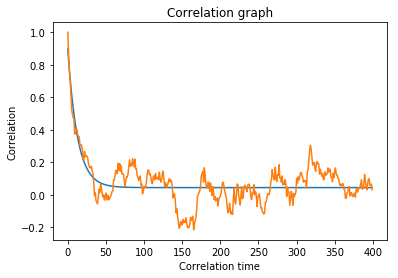

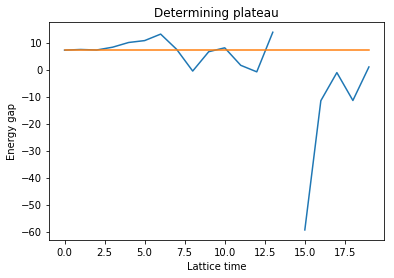

In [26]:
results=corr(mu,m,a,num_iterations,lat_points) #### spring_const,mass,lattice_spacing,num_config,num_lat_points
bin_size=int(1/results[0][1] + 1)
print('bin size is: ',bin_size)

binning(mu,m,a,num_iterations,lat_points,bin_size,results[2]) 
#### spring_const,mass,lattice_spacing,num_config,num_lat_points,size_of_bin,raw_data,d_volume

bootstrap(mu,m,a,num_iterations,lat_points,num_boot_samples)
print('analytical: ', mu/((4*mass)**0.5))

datai=excite(num_iterations,lat_points,results[2],a,m,mu)

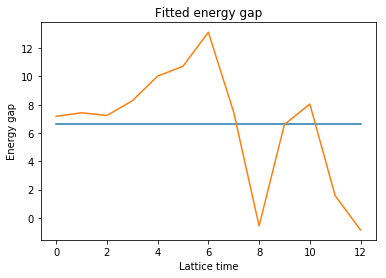

1st excited state energy:  10.1707655785
1st excited state analytical : 10.606601717798213


In [33]:
lat_time=datai[0]
effe=datai[1]
mass=m

plateau=13
effe=effe[0:plateau]
lat_time=lat_time[0:plateau]
popt, pcov = curve_fit(constant, lat_time, effe)

plt.figure(4)
plt.xlabel('Lattice time')
plt.ylabel('Energy gap')
plt.title('Fitted energy gap')
yaxis=0*np.arange(len(lat_time))
yaxis=yaxis+popt[0]
plt.plot(lat_time, yaxis)
plt.plot(lat_time, effe)
plt.show()

print('1st excited state energy: ',(mu**2/(4*mass))**0.5 + popt[0])

print('1st excited state analytical :',((9*mu**2)/(4*mass))**0.5)

Probability density determined


C:\Users\Will\Anaconda3\lib\site-packages\ipykernel\__main__.py:397: RuntimeWarning: divide by zero encountered in true_divide


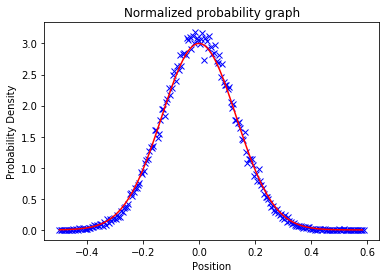

In [55]:
data2=probd(mu,m,a,num_iterations,lat_points,bin_size,d_volume,sets_of_data)

mini=min(data2[0])
maxi=max(data2[0])
x=np.arange(mini,maxi,0.01)
xo=1/(mu*(m**0.5))
c=1/((pi**0.5)*(xo**0.5))

plt.figure(1)
plt.xlabel('Position')
plt.ylabel('Probability Density')
plt.title('Normalized probability graph')
#print(data2[0],data2[1])
plt.plot(data2[0], data2[1],'bx')
plt.plot(x,c*np.exp((-x**2)/xo),'r')
plt.show()


# Reweighting

In [34]:
####reweighting
mass_prime=1.8
spring_const_prime=10.2

reweighted energy 3.5851117645


C:\Users\Will\Anaconda3\lib\site-packages\ipykernel\__main__.py:560: RuntimeWarning: invalid value encountered in log


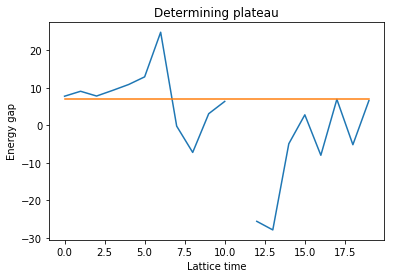

3.801315561749642


In [35]:
data2=reweighting(mu,m,a,num_iterations,lat_points,results[2],mass_prime,spring_const_prime,bin_size)
print(spring_const_prime/(4*mass_prime)**0.5)

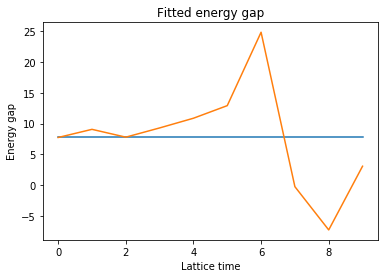

11.6023938882
11.403946685248927


In [36]:
lat_time=data2[0]
effe=data2[1]
mass=m

plateau=10
effe=effe[0:plateau]
lat_time=lat_time[0:plateau]
popt, pcov = curve_fit(constant, lat_time, effe)

plt.figure(4)
plt.xlabel('Lattice time')
plt.ylabel('Energy gap')
plt.title('Fitted energy gap')
yaxis=0*np.arange(len(lat_time))
yaxis=yaxis+popt[0]
plt.plot(lat_time, yaxis)
plt.plot(lat_time, effe)
plt.show()

print((spring_const_prime**2/(4*mass_prime))**0.5 + popt[0])
print((9*spring_const_prime**2 / (4*mass_prime))**0.5)

# Thermalization

Acceptance ratio : 0.52189875 
 The acceptance ratio needs to be around 0.5. 
 If it's too low try reducing 'step', and vv if it's too high. 


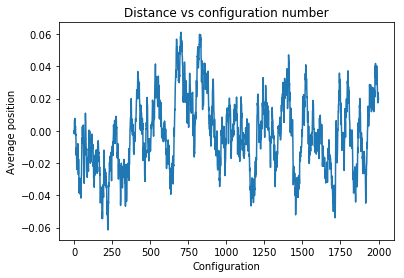

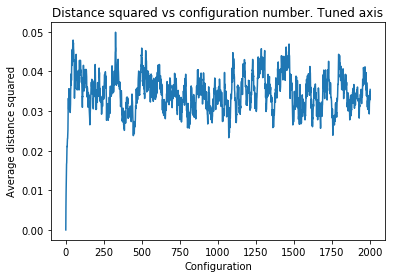

3.5355339059327378


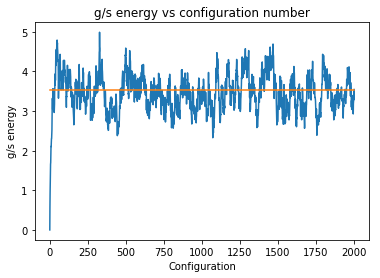

In [23]:
thermalization(tniter,lat_points,m)